# Predicting the Price of Dark Market Cocaine

---

- In this project we used various machine learning models to predict the bitcoin price of dark market cocaine.  

- The dataset is composed of 1504 cleaned and standardized product listings from Dream Market's "Cocaine" category. It was collected with web-scraping and text extraction techniques in July 2017.  See the README.md in our Github repository for more information.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicting-the-Price-of-Dark-Market-Cocaine" data-toc-modified-id="Predicting-the-Price-of-Dark-Market-Cocaine-1">Predicting the Price of Dark Market Cocaine</a></span><ul class="toc-item"><li><span><a href="#Group-Name" data-toc-modified-id="Group-Name-1.1">Group Name</a></span></li><li><span><a href="#Student-Names" data-toc-modified-id="Student-Names-1.2">Student Names</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.3">Load Data</a></span></li><li><span><a href="#Data-Cleaning-and-Feature-Engineering" data-toc-modified-id="Data-Cleaning-and-Feature-Engineering-1.4">Data Cleaning and Feature Engineering</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-1.5">Data Visualization</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1.6">Modeling</a></span><ul class="toc-item"><li><span><a href="#Initial-Fit-of-Models-&amp;-Cross-Validation-Scores" data-toc-modified-id="Initial-Fit-of-Models-&amp;-Cross-Validation-Scores-1.6.1">Initial Fit of Models &amp; Cross Validation Scores</a></span></li><li><span><a href="#Random-Forest-Random-Search-for-Hyperparameter-Tuning" data-toc-modified-id="Random-Forest-Random-Search-for-Hyperparameter-Tuning-1.6.2">Random Forest Random Search for Hyperparameter Tuning</a></span></li></ul></li><li><span><a href="#Model-Comparison-&amp;-Evaluation-Metrics" data-toc-modified-id="Model-Comparison-&amp;-Evaluation-Metrics-1.7">Model Comparison &amp; Evaluation Metrics</a></span></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-1.8">Model Interpretation</a></span></li><li><span><a href="#Conclusion-&amp;-Summary-of-Results" data-toc-modified-id="Conclusion-&amp;-Summary-of-Results-1.9">Conclusion &amp; Summary of Results</a></span></li><li><span><a href="#Takeasway" data-toc-modified-id="Takeasway-1.10">Takeasway</a></span></li></ul></li></ul></div>

## Group Name


 Random_Forest_Elves


## Student Names

1. Shirley Li
2. Jingxian Li 
3. Michael Schulze
4. Mundy Reimer

## Load Data

In [1]:
reset -fs

In [2]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt 

In [3]:
url = 'https://raw.githubusercontent.com/mundyreimer/dark_market_ml/master/fixed_cocaine_listings.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [4]:
df.head()

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,2841,5KG Bolivian Cocaine 92%,"EU → EU, WW",5000.0,92.0,51.50,0.010300,0.011196,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1,4607,✯3kg FLAKES COCAINE 92% ✯GA✯,"NL → WW, US",3000.0,92.0,43.20,0.014400,0.015652,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
2,3407,COCAINE - 2 KILOGRAM - COLOMBIAN - 89% PURE,"DE → WW, AU",2000.0,89.0,38.60,0.019300,0.021685,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
3,2026,2KG Colombian Cocaine 90%,"EU → EU, WW",2000.0,90.0,30.40,0.015200,0.016889,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
4,4606,✯2kg FLAKES COCAINE 92% ✯GA✯,"NL → WW, US",2000.0,92.0,29.89,0.014945,0.016245,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


## Data Cleaning and Feature Engineering

- Data Cleaning
    - In this part we checked distribution of data and performed log transformation on the target varible and feature "grams" to let them have a normal distribution.
    - We transformed True False into 0 and 1.
    - We also fixed the mistakes in encoding price schemes resulting from commas and decimals not being uniform in their use across countries.
- Feature Engineering
    - After clearning the data, we did feature engineering on the data. Initial exploratory data analysis revealed that we could split up our *shipped from-to* column into their individual components from which we then one-hot encoded into their respective categorical variables.
    - As we are digging into the price of online cocain in dark market, we also wanted to see if there's some extra information contained in the product title so we extracted keywords and generated new features like shipping, how the product is cut based on that. 

In [5]:
# Split predictors & response variables, 
# do log transformation on grams, 
# and convert all True-False to 1s and 0s.

y = df.btc_price
df_b = df.drop("btc_price", axis=1)
df_b = df_b.drop(["cost_per_gram_pure", "Unnamed: 0", "product_title", "ships_from_to", "cost_per_gram",
                    "product_link", "vendor_link", "vendor_name", "ships_from", "ships_to", 
                    "ships_to_GR", "ships_from_GR", "ships_to_PL", "ships_from_PL", "ships_to_CO", 
                    "ships_from_CO", "ships_to_SE", "ships_from_SE", "ships_to_S. America", 
                    "ships_from_S. America", "ships_from_DK", "ships_to_DK", "ships_to_CN", "ships_to_CZ", 
                    "ships_to_BR", "ships_to_IT", "ships_from_SI", "ships_to_BE", "ships_from_N. America", 
                    "ships_to_ES", "ships_to_CH", "ships_from_CH", "ships_from_CZ", "ships_from_CN", 
                    "ships_to_WW", "ships_to_DE"], axis=1)

df_b = df_b * 1
df_b["grams"] = np.log(df_b["grams"])
y = np.log(y)

df_b.head()

,grams,quality,escrow,successful_transactions,rating,ships_to_US,ships_from_US,ships_to_NL,ships_from_NL,ships_to_FR,...,ships_from_AU,ships_to_EU,ships_from_EU,ships_from_ES,ships_to_N. America,ships_from_BE,ships_from_WW,ships_to_SI,ships_from_IT,ships_from_BR
0,8.517193,92.0,0,100,4.96,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,8.006368,92.0,0,360,4.86,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,7.600902,89.0,1,70,5.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.600902,90.0,0,100,4.96,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,7.600902,92.0,0,360,4.86,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Extract key words from product title for feature engineering

my_regex = {"intro": "intro|sample",
           "columbia": "columbia",
           "peru": "peru",
           "bolivia": "bolivia",
           "free_ship": "freeship",
           "uncut": "uncut",
           "fishcut": "fish",
           "brick": "brick",
           "crack": "crack",
           "crystal": "crystal",
           "flake": "flake",
           "pure": "pure"}

for my_key in my_regex.keys():
    df_b.loc[df.product_title.str.replace("\s", "")\
                                .str.lower()
                                .str.contains(my_regex[my_key]), my_key] = 1
    df_b.loc[~df.product_title.str.replace("\s", "")\
                                .str.lower()
                                .str.contains(my_regex[my_key]), my_key] = 0


df_b["caps"] = df.product_title.str.findall(r'[A-Z]').str.len()/df.product_title.str.len()

df_b.head()

,grams,quality,escrow,successful_transactions,rating,ships_to_US,ships_from_US,ships_to_NL,ships_from_NL,ships_to_FR,...,bolivia,free_ship,uncut,fishcut,brick,crack,crystal,flake,pure,caps
0,8.517193,92.0,0,100,4.96,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667
1,8.006368,92.0,0,360,4.86,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.535714
2,7.600902,89.0,1,70,5.00,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.651163
3,7.600902,90.0,0,100,4.96,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160000
4,7.600902,92.0,0,360,4.86,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.535714


In [7]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(df_b, y, test_size=0.2,shuffle = True)

## Data Visualization

- In the visualization part, we did visualization on numerical data and categorical data seperately.
- For numerical data, we plot cocain origin against mean price, as origin is shown to be important features.
- For categorical data, we plot their value against price to have a initial understanding of how binary features influence target.

In [8]:
df['ship_from'] = df.ships_from_to.str[:2]
df.head()
ship_from = df.groupby('ship_from').agg(
    {'btc_price': ['mean', 'count']}).reset_index()
ship_from = pd.concat([ship_from['ship_from'], ship_from['btc_price']], axis=1)
ship_from.loc[ship_from['count'] < 5, 'count_less_than_5'] = 'Yes'
ship_from.loc[ship_from['count'] >= 5, 'count_less_than_5'] = 'No'
ship_from = ship_from.sort_values('mean', ascending=False)
ship_from

,ship_from,mean,count,count_less_than_5
5,CN,3.350000,1,Yes
9,EU,3.019201,72,No
13,NL,1.590375,496,No
7,DE,1.190882,376,No
15,US,0.903358,112,No
12,IT,0.738067,7,No
0,AU,0.729898,40,No
10,FR,0.633551,70,No
16,WW,0.366559,16,No
3,CA,0.339558,19,No


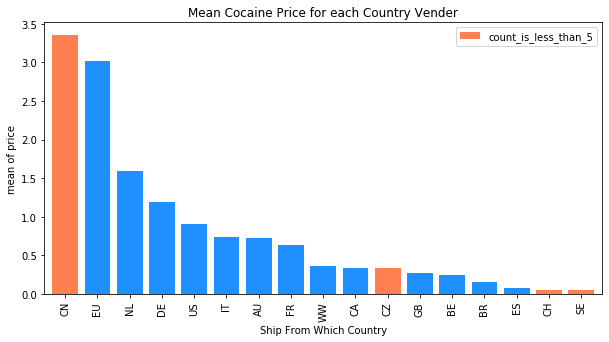

In [9]:
colors = {'Yes': 'coral', 'No': 'dodgerblue'}
ship_from_plt = ship_from.rename(columns={'mean': 'count_is_less_than_5'})
ax = ship_from_plt.plot(x='ship_from', y='count_is_less_than_5', kind='bar',
                        color=ship_from_plt['count_less_than_5'].apply(lambda x: colors[x]), figsize=(10, 5), width=0.8)
ax.set_xlabel('Ship From Which Country')
ax.set_ylabel('mean of price')
ax.set_title('Mean Cocaine Price for each Country Vender')
plt.show()

In [10]:
data = pd.concat([df.btc_price,df_b],axis=1)

In [11]:
col_lst = list(data.columns[-13:])
col_lst.append('escrow')
col_lst.remove('caps')
col_lst

['intro',
 'columbia',
 'peru',
 'bolivia',
 'free_ship',
 'uncut',
 'fishcut',
 'brick',
 'crack',
 'crystal',
 'flake',
 'pure',
 'escrow']

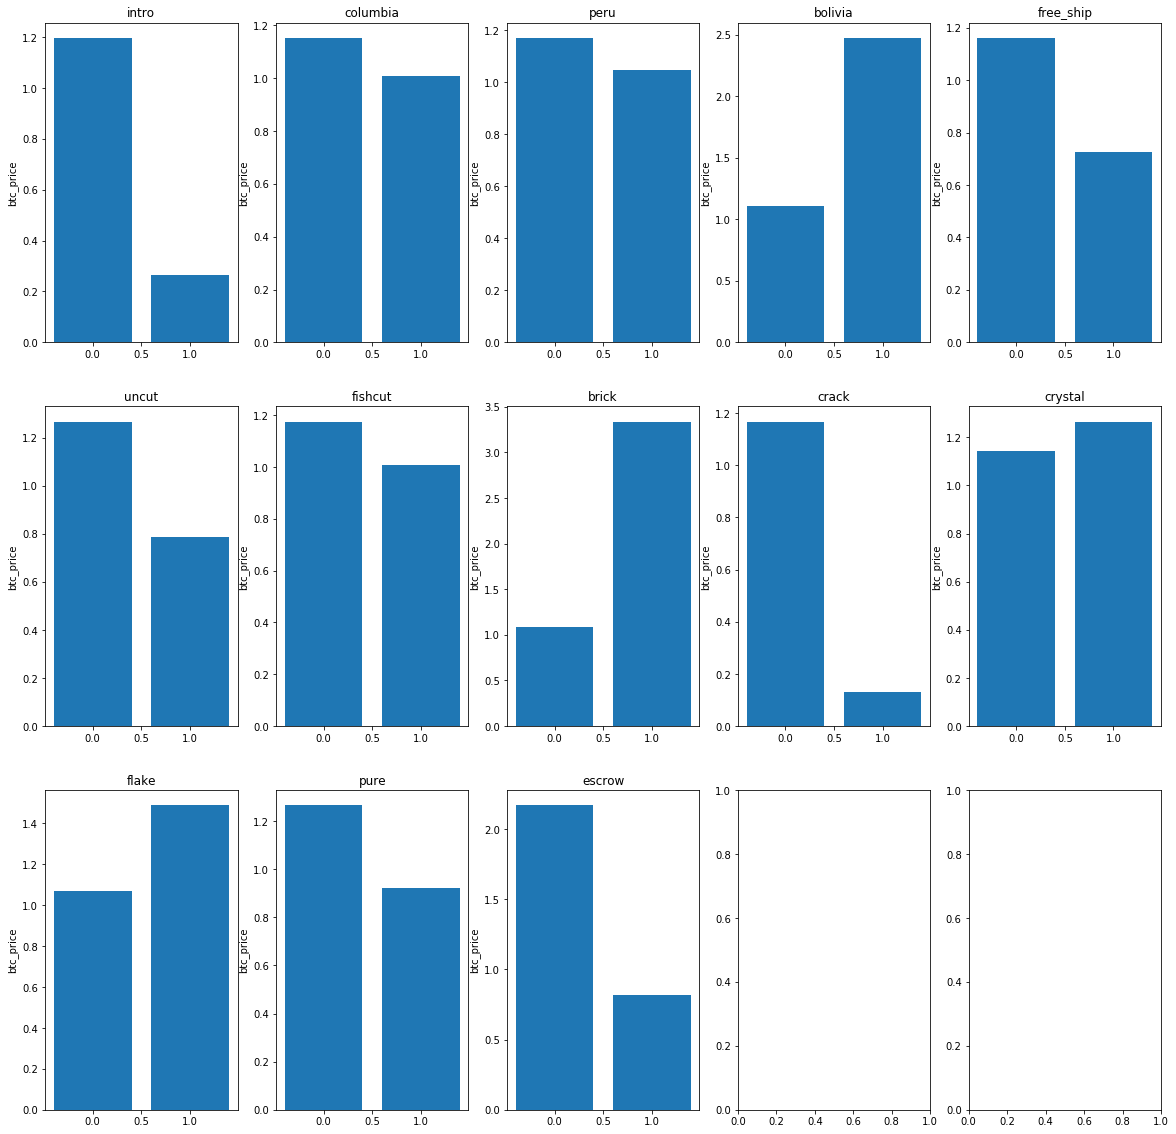

In [12]:
fig, axs = plt.subplots(3, 5, figsize=(20, 20))
i = 0
for col in col_lst:
    row_index = int(i / 5)
    col_index = i % 5
    new_dataset = data.groupby(col).mean()['btc_price'].reset_index()
    axs[row_index, col_index].bar(
        new_dataset[col], new_dataset['btc_price'])
    axs[row_index, col_index].set_title(col)
    axs[row_index, col_index].set_title(col)
    axs[row_index, col_index].set_ylabel('btc_price')
    i += 1

## Modeling

- We trained a variety of machine learning models ranging from simple linear regression, linear regression with added feature engineering, L1, L2, and a Random Forest Regressor model.
- Our Random Forest model ended up undergoing further hyperparameter tuning using Random Search, and all models underwent Cross Validation to assess how well our models would generalize.Our models were evaluated using RMSE and MEDAE, with MEDAE being our metric of choice due to the interpretability it lent via errors in price prediction.
- Linear regression serves as a baseline model for our dataset. Ridge and Lasso improve the model's performance but not too much. Random forest also gives descent result, sometimes better than linear models (result varies every run).
- Although we initially found our linear regression model with added feature engineering to be our strongest performing model (and from which we interpreted our coefficients and predictive variables), we later found our Random Forest Regressor model to have the strongest predictive power when comparing MEDAE across the board. 

### Initial Fit of Models & Cross Validation Scores

Models that were used and placed into pipeline include Linear Regression, L1, L2, and Random Forest.

In [13]:
print("Cross Validation Score")
pipelines = [LinearRegression(),
             Lasso(),
             Ridge(),
             RandomForestRegressor(criterion='mae')]

for pipe in pipelines:
    pipe.fit(X_train,y_train)
    name = pipe.__class__.__name__.split('.')[-1]
    cv_medae = cross_val_score(pipe, X_train,y_train, scoring = 'neg_median_absolute_error', cv =5)
    cv_score = cross_val_score(pipe, X_train,y_train, scoring = 'r2', cv =5)
    print(f"{name}")
    print(f"Average cross validation R^2: {cv_score.mean():.4}")
    print(f"{cv_score}")
    print(f"Average cross validation Medae: {cv_medae.mean():.4}")
    print(f"{cv_medae}",end = "\n\n")

Cross Validation Score
LinearRegression
Average cross validation R^2: 0.9403
[0.96824253 0.90866951 0.97977209 0.85944959 0.98560616]
Average cross validation Medae: -0.1076
[-0.10997495 -0.1046638  -0.10710083 -0.09241452 -0.12362185]

Lasso
Average cross validation R^2: 0.8399
[0.88556985 0.79380307 0.88238946 0.75563848 0.88222534]
Average cross validation Medae: -0.415
[-0.39932706 -0.44837899 -0.38820964 -0.4490803  -0.38990213]

Ridge
Average cross validation R^2: 0.9405
[0.96842923 0.90862611 0.97995158 0.85960678 0.98563791]
Average cross validation Medae: -0.1085
[-0.11055739 -0.10811254 -0.10933223 -0.09195884 -0.12246195]



/Users/jingxianli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor
Average cross validation R^2: 0.9145
[0.94469758 0.89955942 0.96614022 0.84559087 0.91630275]
Average cross validation Medae: -0.1288
[-0.12598618 -0.13613473 -0.11768271 -0.13389996 -0.13018918]



### Random Forest Random Search for Hyperparameter Tuning

In [14]:
cv = 5
n_iter = 20

In [15]:
hyperparameters = dict(n_estimators=range(10, 200),
                       max_depth=range(3, 12))
rf_random = RandomizedSearchCV(RandomForestRegressor(
    criterion='mae', random_state=42), hyperparameters, cv=cv, n_iter=n_iter)

In [16]:
hyperparameters = dict(n_estimators=range(10, 200),
                       max_depth=range(3, 12))
rf_random = RandomizedSearchCV(RandomForestRegressor(
    criterion='mae', random_state=42), hyperparameters,n_iter = n_iter)

In [17]:
rf_random.fit(X_train, y_train)

/Users/jingxianli/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mae',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_st

In [18]:
cross_val_score(rf_random, X_train, y_train)

/Users/jingxianli/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/jingxianli/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/jingxianli/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.96538203, 0.92524844, 0.88650469])

## Model Comparison & Evaluation Metrics

- We used two metrics to evaluate our model, Median Abosulte Error and Root Mean Square Error. MEDAE serves as a north star metric because we don't want outliers to influence our model evaluation. We also take RMSE into consideration, based on these two metrics, Random forest is the best one.

In [19]:
y_test = np.exp(y_test)
y_train = np.exp(y_train)
X_test["grams"] = np.exp(X_test["grams"])
X_train["grams"] = np.exp(X_train["grams"])

/Users/jingxianli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jingxianli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
for pipe in pipelines:
    name = pipe.__class__.__name__
    pred_test = pipe.predict(X_test)
    medae_value = median_absolute_error(y_test, pred_test)
    print(f"{medae_value:.4f} medae on {name} test set")
    mse_value = mean_squared_error(y_test, pred_test)
    rmse_value = np.sqrt(mse_value)
    print(f"{rmse_value:.4f} mse on {name} test set")

3.0243 medae on LinearRegression test set
179.9358 mse on LinearRegression test set
2.5461 medae on Lasso test set
122.4694 mse on Lasso test set
3.0214 medae on Ridge test set
179.7095 mse on Ridge test set
2.6410 medae on RandomForestRegressor test set
3.5640 mse on RandomForestRegressor test set


In [21]:
pred_test = rf_random.predict(X_test)
medae_value = median_absolute_error(y_test, pred_test)
print(f"{medae_value:.4f} medae on rf_random_search test set")
mse_value = mean_squared_error(y_test, pred_test)
rmse_value = np.sqrt(mse_value)
print(f"{rmse_value:.4f} mse on rf_random_search test set")

2.6276 medae on rf_random_search test set
3.5641 mse on rf_random_search test set


As can be seen above, our Random Forest Regressor Model performed the best with the lowest MEDAE on our test set.  Initially our Linear Regression Model with the additional feature engineering done on it performed the best.  That model's interpretation is given below. 

## Model Interpretation


- We split our analysis between numeric and categorical variables. For our numeric variables, we found that the grams variable had the strongest predictive power of btc price, which is consistent with our intuition. However, in analyzing our categorical variables, we gleaned useful insights such as the place where this cocaine was shipped from was more important than where it was shipped to, probably because of strict drug laws in the home country posing an extra risk on the vendor's side which drove up price, as can be seen in cases like China. Another interesting feature ended up being the type and cut of the product and whether or not it was in the form of "crystal" or not.

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

grams 0.014553213446972222
quality 0.0018282587123315565
successful_transactions 0.00011470389399737636
rating -0.047363997668662
ships_from_US 0.04983563623682667
ships_to_NL 0.03228831783248388
ships_to_CA -0.017956703711775247
ships_from_CA 0.009104403647073718
ships_to_EU 0.03415704711385028
ships_to_N. America -0.016544915050798692
ships_from_BE -0.026467260652667895
ships_from_WW 0.02651133358412257
uncut 0.0026165610488201427
crystal -0.04890634371550756
pure 0.015261820193600305


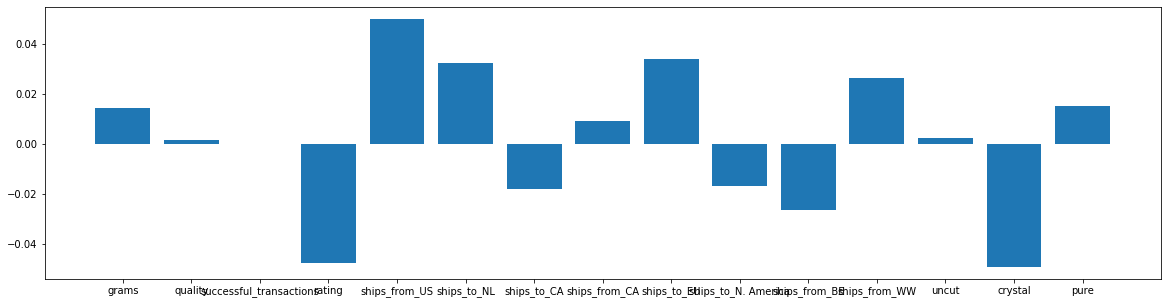

In [23]:
# Interpreting coefficients
ls = []
ls1 = []
for x,y in zip(list(df_b.columns), lm.coef_):
    if abs(y) < 0.05:
        print(x,y)
        ls.append(x)
        ls1.append(y)
fig, ax = plt.subplots(figsize=(20,5))
plt.bar(ls,ls1)
plt.show()

ships_to_AU 2.9801006586836354
ships_from_AU -2.316528433401238
bolivia -1.0831184098656466


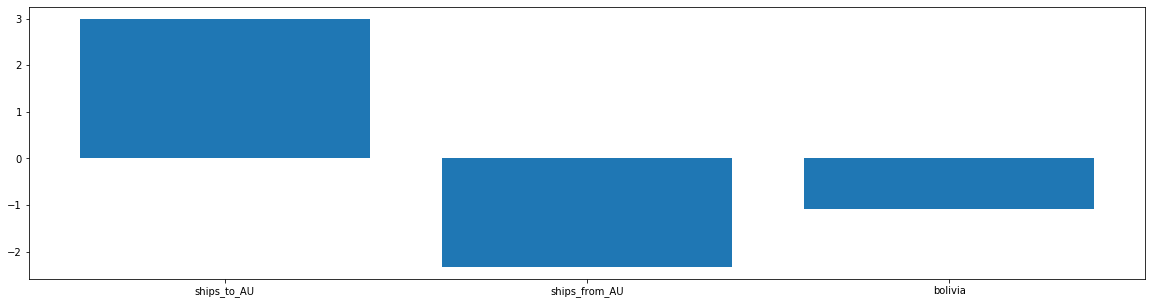

In [24]:
# Interpret coefficients
ls = []
ls1 = []
for x,y in zip(list(df_b.columns), lm.coef_):
    if abs(y) >= 0.5:
        print(x,y)
        ls.append(x)
        ls1.append(y)
fig, ax = plt.subplots(figsize=(20,5))
plt.bar(ls,ls1)
plt.show()

Checking the relationship between our strongest predictor variable:

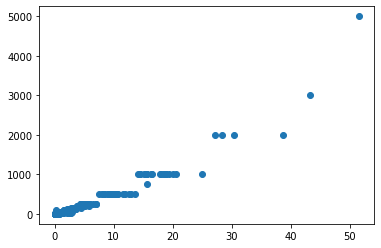

In [25]:
plt.scatter(y_train, X_train["grams"])
plt.show()

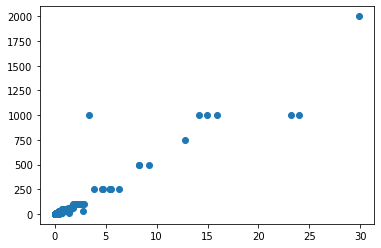

In [26]:
plt.scatter(y_test, X_test["grams"])
plt.show()

## Conclusion & Summary of Results

- In this project we used various machine learning models to predict the btc price of dark market cocaine.  Our dataset was composed of approximately 1,400 cleaned and standardized product listings from Dream Market's "Cocaine" category.

- Initial exploratory data analysis revealed that we could split up our *shipped from-to* column into their individual components from which we then one-hot encoded into their respective categorical variables.  Further feature engineering via string extraction and manipulation was done on our *product title* column as we noticed that not all amounts in the *price*  column were scraped correctly and that there were some mistakes in encoding price schemes resulting from commas and decimals not being uniform in their use across countries.

- We then trained a variety of machine learning models ranging from simple linear regression, linear regression with added feature engineering, L1, L2, and a Random Forest Regressor model.  Our Random Forest model ended up undergoing further hyperparameter tuning using Random Search, and all models underwent Cross Validation to assess how well our models would generalize.  Our models were evaluated using RMSE and MEDAE, with MEDAE being our metric of choice due to the interpretability it lent via errors in price prediction.

- Although we initially found our linear regression model with added feature engineering to be our strongest performing model (and from which we interpreted our coefficients and predictive variables), we later found our Random Forest Regressor model to have the strongest predictive power when comparing MEDAE across the board. 

- In interpreting our model, we split our analysis between numeric and categorical variables.  For our numeric variables, we found that the grams variable had the strongest predictive power of btc price, which is consistent with our intuition.  However, in analyzing our categorical variables, we gleaned useful insights such as the place where this cocaine was shipped from was more important than where it was shipped to, probably because of strict drug laws in the home country posing an extra risk on the vendor's side which drove up price, as can be seen in cases like China.  Another interesting feature ended up being the type and cut of the product and whether or not it was in the form of "crystal" or not.  

- Overall, our model performed with a median absolute error of about $44 USD, which as of this time is the best performing model on Kaggle.  

## Takeaways

- The strongest predictor for price of cocaine is grams.
- To predict cocaine price, the places where this cocaine was shipped from (ship_from variables) are more important than where it was shipped to (ship_to variables), probably because strict drug laws or border control in the home country will pose an extra risk on the vendor’s side which would drive up the price, as can be seen in cases like China.
- Other features describing the form of cocaine, such as brick, crack, uncut and crystal, also have strong prediction ability.
- When the cocaine transaction is accompanied with escrow, the cocaine price could be more expensive, possibly because customers believe it is worthy to pay more to ensure the success of transaction. In the meanwhile, free_ship cocaine would be less expensive, as usually people pay extra to get those cocaine disguised so free shipping is not what people want.